<a href="https://colab.research.google.com/github/Aditya-Singh-CSE/Task-2-Sparks-Project/blob/main/Task_2_Sparks_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP - THE SPARKS FOUNDATION**
Data Science and Businesss Analytics Task 2 - Prediction Using Unsupervised ML

Author : Aditya Singh

# **Importing the required libraries**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

# **Load the Data**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Explore the Data**

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Checking for Outliers**

In [10]:
df=df.drop(labels=['Id','Species'],axis=1)

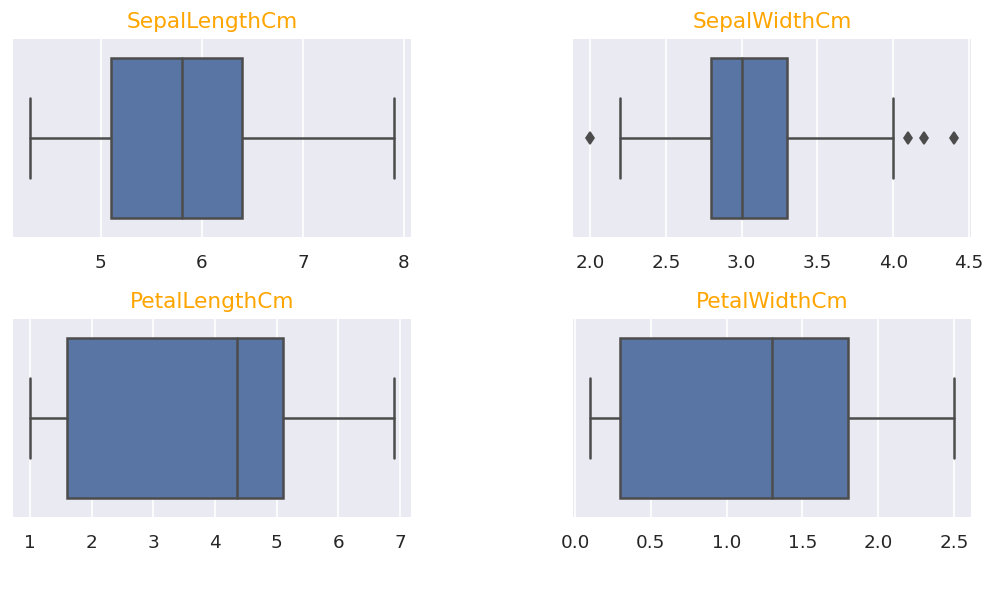

In [11]:
# Ccentral tendency plot by using boxplot

plt.figure(figsize=(10,5), dpi = 120)
sns.set()
for i in range(len(df.columns)):
    plt.subplot(2,2,i+1)
    plt.title(df.columns[i], color = 'orange', fontsize = '13')
    sns.boxplot(data = df , x = df.columns[i])
    plt.xlabel(" ")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [12]:
#Removing outliers from 'SpelLengthCm' column
low = df["SepalLengthCm"].quantile(0.15)
high  = df["SepalLengthCm"].quantile(0.80)

df = df[(df["SepalLengthCm"] < high) & (df["SepalLengthCm"] > low)]

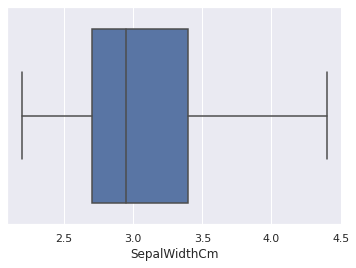

In [13]:
sns.boxplot(data = df , x = df.columns[1]);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  88 non-null     float64
 1   SepalWidthCm   88 non-null     float64
 2   PetalLengthCm  88 non-null     float64
 3   PetalWidthCm   88 non-null     float64
dtypes: float64(4)
memory usage: 3.4 KB


# **Calculating the number of clusters**

In [15]:
from sklearn.cluster import KMeans
css =[]
df = df.iloc[:, [0, 1, 2, 3]].values
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init= 'k-means++', max_iter =3, n_init =10,random_state=0)
    kmeans.fit(df)
    css.append(kmeans.inertia_)

# **Plotting the results : Elbow Method**

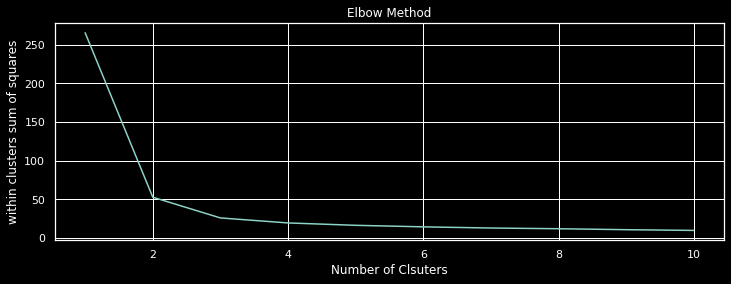

In [16]:
plt.style.use('dark_background')
plt.figure(figsize=(12,4))
plt.plot(range(1,11),css)
plt.xlabel("Number of Clsuters")
plt.ylabel("within clusters sum of squares")
plt.title("Elbow Method")
plt.show()

The within clusters sum of squares doesnt decrease significantly after 3 clusters. Hence, we choose the number of clusters as 3.

# **Training the model**

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(df)
print("\n Model Training Completed")


 Model Training Completed


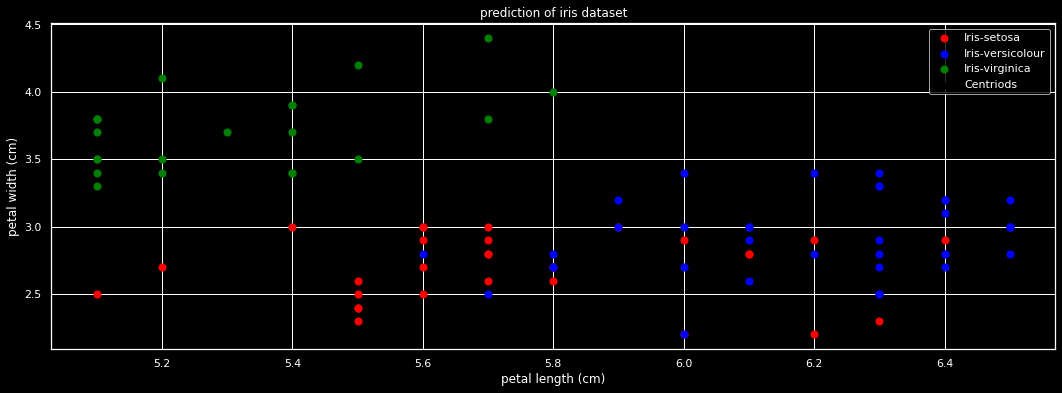

In [26]:
# Visualising the clusters
plt.style.use('dark_background')
plt.figure(figsize=(18,6))
plt.scatter(df[y_kmeans == 0,0],df[y_kmeans == 0,1],c = 'red', s= 50 , label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 1,0], df[y_kmeans == 1 , 1] , c = 'blue' ,s=50, label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 2,0] , df[y_kmeans == 2,1] , c = 'green', s = 50 , label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker = 's' , c = 'black' , label = 'Centriods')
plt.title("prediction of iris dataset")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()